# House Sales in King County, USA

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

This is my first attempt in using simple regression models to predict house prices in King County, USA.

### This is a list of features in out dataset

- <b>id</b> : Unique notation for each house sold (primary key of the dataset)

- <b> date</b>: Date house was sold


- <b>price</b>: Price of the house (our prediction target)


- <b>bedrooms</b>: Number of bedrooms


- <b>bathrooms</b>: Number of bathrooms

- <b>sqft_living</b>: Square footage of the home

- <b>sqft_lot</b>: Square footage of the lot


- <b>floors</b> :Total floors (levels) in house


- <b>waterfront</b> :House which has a view to a waterfront


- <b>view</b>: boolean feature (**True** (1) if the house has been viewed, **False** (0) if the house has not been viewed)


- <b>condition</b> :How good the condition is overall

- <b>grade</b>: overall grade given to the housing unit, based on King County grading system


- <b>sqft_above</b> : Square footage of house apart from basement


- <b>sqft_basement</b>: Square footage of the basement

- <b>yr_built</b> : year the house was built


- <b>yr_renovated</b> : Year when the house was renovated

- <b>zipcode</b>: Zip code


- <b>lat</b>: Latitude coordinate

- <b>long</b>: Longitude coordinate

- <b>sqft_living15</b> : Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area


- <b>sqft_lot15</b> : LotSize area in 2015(implies-- some renovations)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Exploratory Data Analysis

In [2]:

file_name='kc_house_data.csv'
df=pd.read_csv(file_name)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### Get an overview of our dataset

In [3]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
#Check if there is any null value in our dataset
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

I will add a new feature 'age' to the dataset and remove feature 'yr_built'. We will also drop 'id' and 'date' since these features won't help us predicting the price of houses (our target).

In [7]:
df['age'] = df['yr_built'].max() - df['yr_built']
df.drop(df[['yr_built', 'id', 'date']], inplace = True, axis = 1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,0,98178,47.5112,-122.257,1340,5650,60
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1991,98125,47.7210,-122.319,1690,7639,64
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,0,98028,47.7379,-122.233,2720,8062,82
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,0,98136,47.5208,-122.393,1360,5000,50
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,0,98074,47.6168,-122.045,1800,7503,28


#### We now look at some basic plots about correlations between the dataset's features and the price.

- Look at the numbers from the table. It is a real number ranged between -1 to 1. The magnetude of the number close to 1 indicates there is a strong correlation between two variables and the magnetude of the nunber close to 0 indicates there is a weak to none correlation between two variables. Positive sign of the number indicates there is a positive correlation and negative sign indicates negative correlation.
- We will see it more intuatively with the heatmap below the numeric table.

In [8]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447,-0.054012
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244,-0.154178
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175,-0.506019
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286,-0.318049
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557,-0.053080
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269,-0.489319
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703,0.026161
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575,0.053440
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406,0.361417
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248,-0.446963


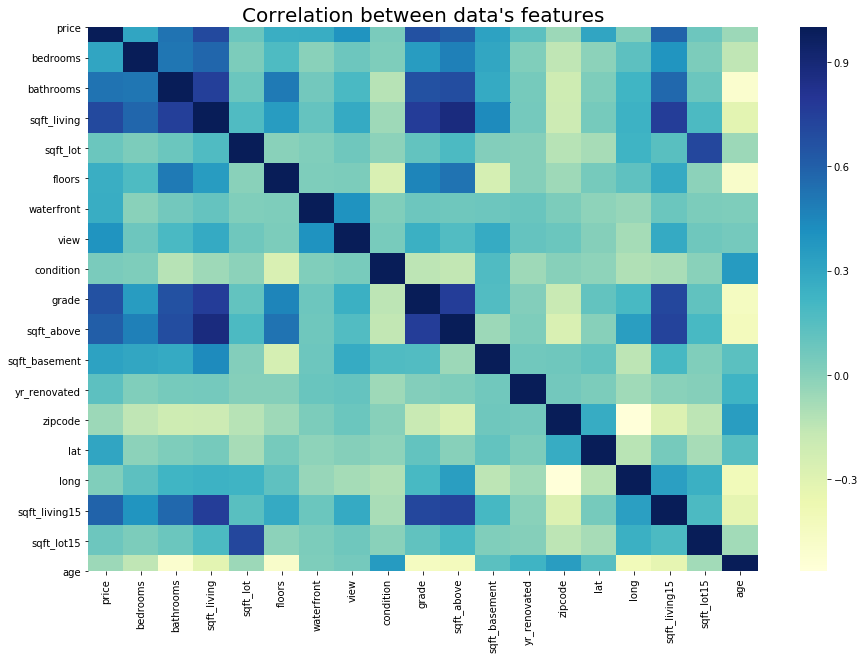

In [9]:
def corr_heatmap(data):
    ax = plt.subplots(figsize = (15, 10))
    sns.heatmap(df.corr(), cmap="YlGnBu")
    plt.title("Correlation between data's features", fontsize = 20)
corr_heatmap(df.corr())  

# Data Visualization

##### We now look at few plots between 'price' and other features

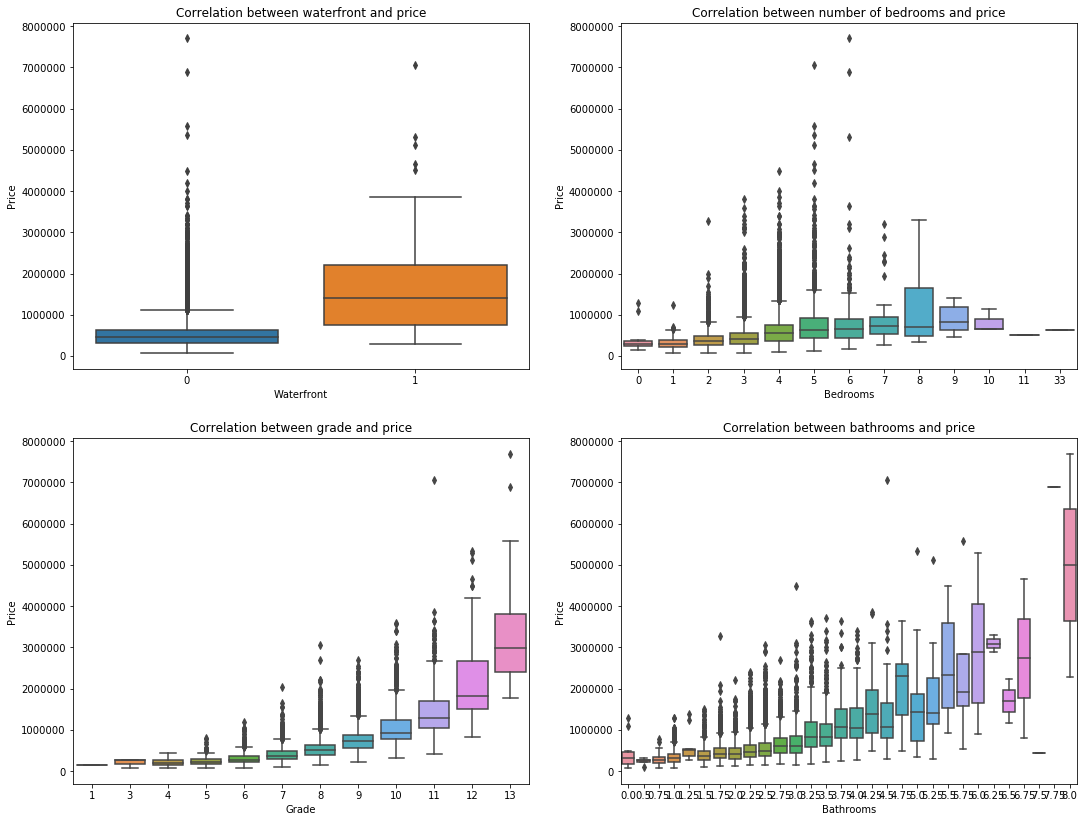

In [10]:
fig = plt.figure(figsize = (18,14)) # create figure

ax0 = fig.add_subplot(221) # add subplot 1 (1 row, 2 columns, first plot) # add_subplot(1, 2, 1)
ax1 = fig.add_subplot(222) # add subplot 2 (1 row, 2 columns, second plot). See tip below** # add_subplot(1, 2, 2)
ax2 = fig.add_subplot(223)
ax3 = fig.add_subplot(224)

# Subplot 1:
sns.boxplot(x='waterfront',y='price', data=df, ax=ax0)
ax0.set_title('Correlation between waterfront and price')
ax0.set_xlabel('Waterfront')
ax0.set_ylabel('Price')

# Subplot 2:
sns.boxplot(x='bedrooms',y='price',data=df, ax=ax1)
ax1.set_title('Correlation between number of bedrooms and price')
ax1.set_xlabel('Bedrooms')
ax1.set_ylabel('Price')

#Subplot 3:
sns.boxplot(x='grade',y='price',data=df, ax=ax2)
ax2.set_title('Correlation between grade and price')
ax2.set_xlabel('Grade')
ax2.set_ylabel('Price')

#Subplot 4:
sns.boxplot(x='bathrooms',y='price',data=df, ax=ax3)
ax3.set_title('Correlation between bathrooms and price')
ax3.set_xlabel('Bathrooms')
ax3.set_ylabel('Price')


plt.show()

#### I have a few observations based on the boxplots above:
- It's clearly that houses with waterfront view is more valueable than the ones without.
- There is a weakly positive correlation between number of bedrooms and the price. The plot shows there are quite many outliers between these two features.
- There is a positive correlation between grade and price. This is understandable since the grade of the house determines how valueable the house is.
- Interestingly, the correlation between number of bathrooms and price is a bit stronger than the correlation between number of bedrooms and the price. Even though there are still some outliers, we still see the positive relationship between these two features.

##### Let's look at few more plots to see the relationships between 'price' and other features

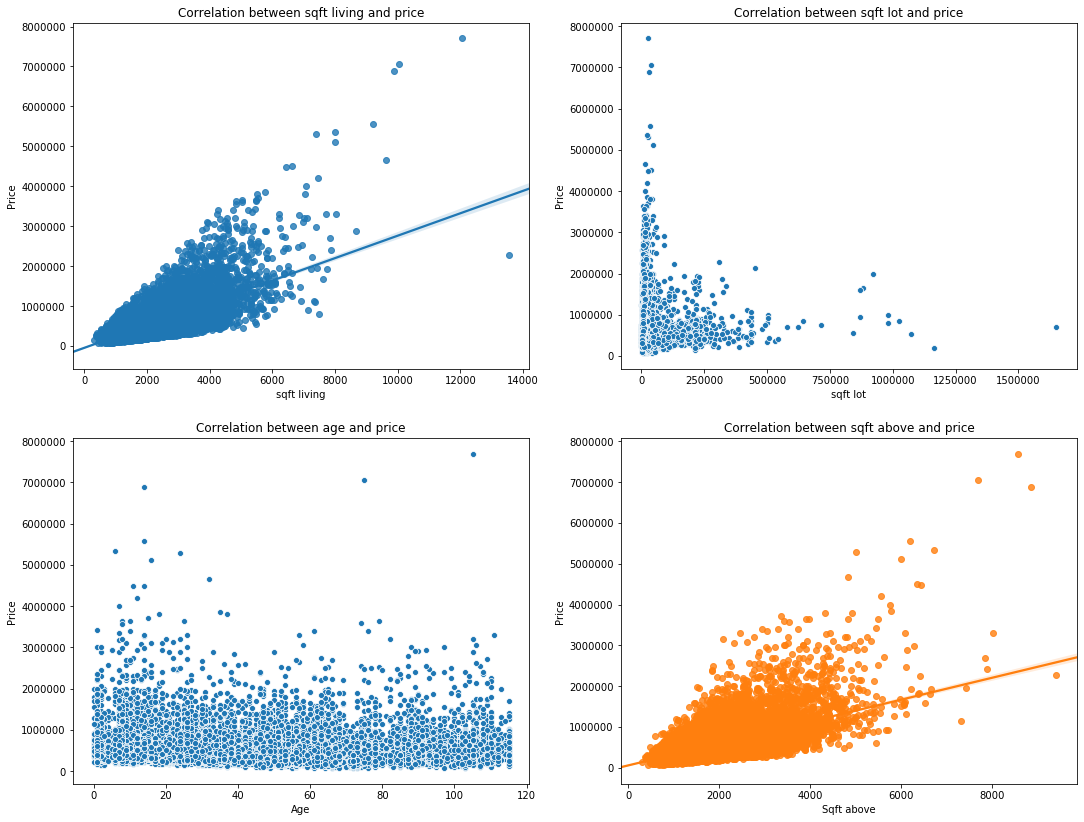

In [11]:
fig = plt.figure(figsize = (18,14)) # create figure

ax0 = fig.add_subplot(221) # add subplot 1 (1 row, 2 columns, first plot) # add_subplot(1, 2, 1)
ax1 = fig.add_subplot(222) # add subplot 2 (1 row, 2 columns, second plot). See tip below** # add_subplot(1, 2, 2)
ax2 = fig.add_subplot(223)
ax3 = fig.add_subplot(224)

# Subplot 1 (regression plot) : 
sns.regplot(x='sqft_living',y='price', data=df, ax=ax0)
ax0.set_title('Correlation between sqft living and price')
ax0.set_xlabel('sqft living')
ax0.set_ylabel('Price')

# Subplot 2 (Scatter plot) :
sns.scatterplot(x='sqft_lot',y='price',data=df, ax=ax1)
ax1.set_title('Correlation between sqft lot and price')
ax1.set_xlabel('sqft lot')
ax1.set_ylabel('Price')

# Subplot 3 (Scatter plot) :
sns.scatterplot(x='age',y='price',data=df, ax=ax2)
ax2.set_title('Correlation between age and price')
ax2.set_xlabel('Age')
ax2.set_ylabel('Price')

# Subplot 4 (Regression plot) :
sns.regplot(x='sqft_above',y='price',data=df, ax=ax3)
ax3.set_title('Correlation between sqft above and price')
ax3.set_xlabel('Sqft above')
ax3.set_ylabel('Price')


plt.show()

#### I have few more observations based on the plots above:
- We can see there are positive correlations between sqft living, sft above with price. The regression lines show us that.
- We have nothing based on sqft lot and age. The plots scatter all over the place.


> We can use the Pandas method <code>corr()</code>  to find the features other than price that is most correlated with price. Then we plot this table to show it more clearly.

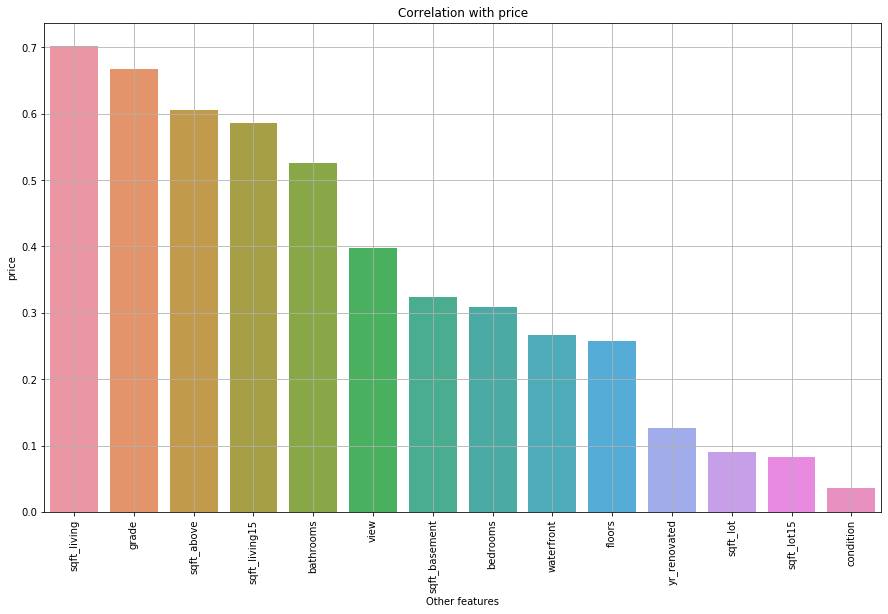

In [12]:
# Create a new dataframe df_temp with no feature 'long', 'zipcode', 'age', 'lat' : 
df_temp = df.drop(df[['long','lat', 'zipcode', 'age']], axis = 1)

# Sorting the data and reset the index
df_corr = df_temp.corr().iloc[0,:].sort_values(ascending=False).reset_index()

df_corr = df_corr[df_corr["price"] < 1]  # Eliminate the 'price' in the x-axis

plt.figure(figsize=(15,9))
sns.barplot(x = "index", y = "price", data = df_corr);
plt.xlabel("Other features")
plt.xticks(rotation = 90)
plt.title("Correlation with price");
plt.grid(True)
sns.set_style("dark")

In [13]:
from PIL import Image # converting images into arrays

In [14]:
floor_df = df.floors.value_counts()
floor_df.rename_axis('floor value', inplace = True)
floor_df_t = floor_df.transpose()
floor_df_t

floor value
1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

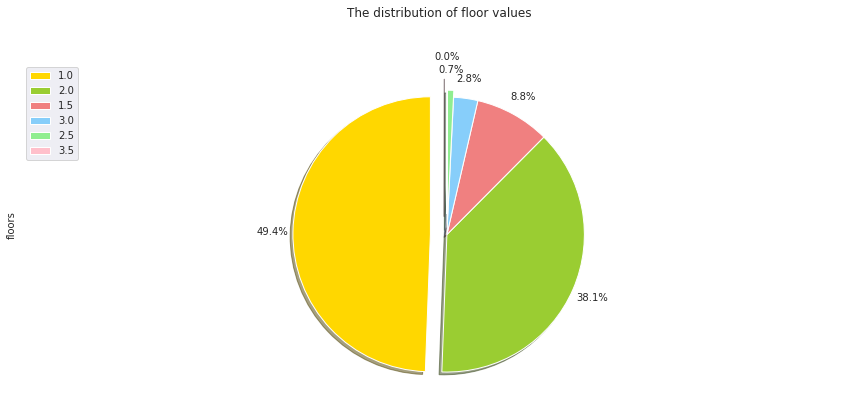

In [15]:


colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.12, 0, 0, 0, 0.05, 0.15] # ratio for each continent with which to offset each wedge.

floor_df.plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,
                              
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.15,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 floor values
                            )

# scale the title up by 12% to match pctdistance
plt.title('The distribution of floor values', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=floor_df.index, loc='upper left') 

plt.show()

In [16]:
# Now we import folium for the tasks
import folium
from folium.plugins import FastMarkerCluster

In [17]:
df_geo = df[["zipcode" , "lat" , "long"]]

lat = df_geo["lat"]
long = df_geo["long"]

cordinates = list(zip(lat,long))

In [18]:
king_map = folium.Map(location = [47.5480, -122.257], zoom_start = 10)

FastMarkerCluster(data=cordinates).add_to(king_map)

king_map

# Model developments

###  Simple Linear Regression and Multiple Linear Regression

> Let's try simple linear regression model and calculate R^2 between 'price' and other features

In [19]:
Y = df['price']

lm1 = LinearRegression()
X1 = df[['sqft_living']]
lm1.fit(X1,Y)
print('The R^2 score between \'sqft_living\' and \'price\' is ' + str(lm1.score(X1,Y)))

lm2 = LinearRegression()
X2 = df[['bathrooms']]
lm2.fit(X2,Y)
print('The R^2 score between \'bathrooms\' and \'price\' is ' + str(lm2.score(X2,Y)))

lm3 = LinearRegression()
X3 = df[['grade']]
lm3.fit(X3,Y)
print('The R^2 score between \'grade\' and \'price\' is ' + str(lm3.score(X2,Y)))

The R^2 score between 'sqft_living' and 'price' is 0.49285321790379316
The R^2 score between 'bathrooms' and 'price' is 0.27576939959239877
The R^2 score between 'grade' and 'price' is -9.635098280214688


> - Let's plot the actual values of price againts the values predicted

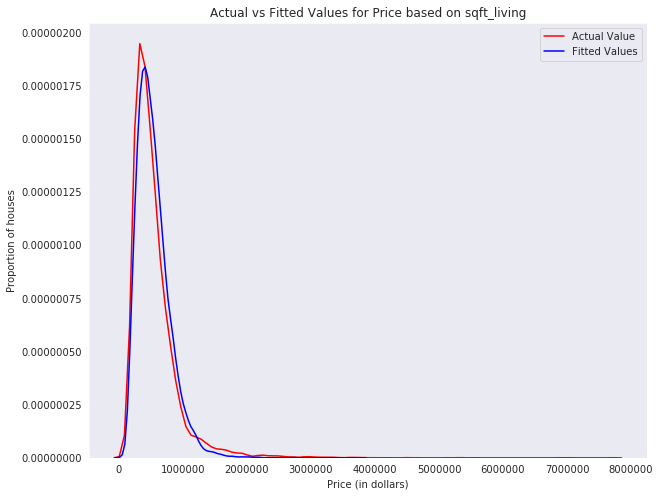

In [20]:
width = 10
height = 8
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(lm1.predict(X1), hist=False, color="b", label="Fitted Values" , ax=ax1)

#We can adjust histogram True or False if we want to include the histogram along with the distribution lines

plt.title('Actual vs Fitted Values for Price based on sqft_living')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of houses')

plt.show()
plt.close()

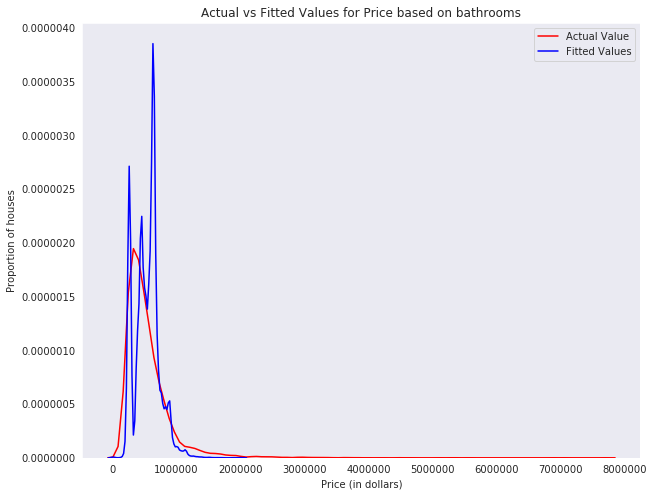

In [21]:
width = 10
height = 8
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(lm2.predict(X2), hist=False, color="b", label="Fitted Values" , ax=ax1)

#We can adjust histogram True or False if we want to include the histogram along with the distribution lines

plt.title('Actual vs Fitted Values for Price based on bathrooms')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of houses')

plt.show()
plt.close()

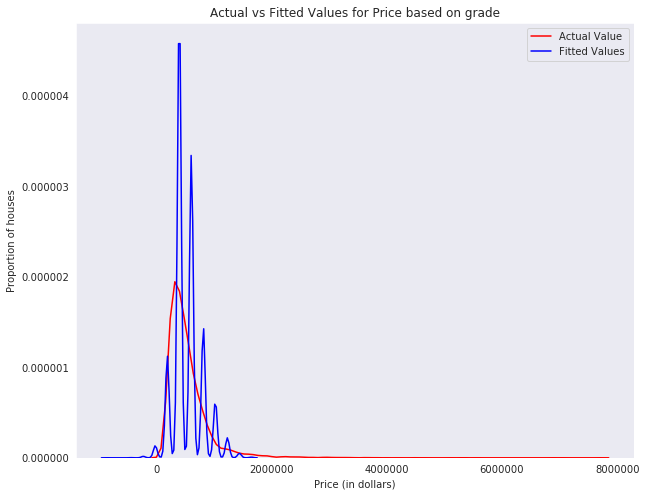

In [22]:
width = 10
height = 8
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(lm3.predict(X3), hist=False, color="b", label="Fitted Values" , ax=ax1)

#We can adjust histogram True or False if we want to include the histogram along with the distribution lines

plt.title('Actual vs Fitted Values for Price based on grade')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of houses')

plt.show()
plt.close()

> We now use multiple linear regression to predict the 'price' using list of features:

In [23]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]

In [24]:
lm4 = LinearRegression()
X4 = df[features]
X4.head()

,floors,waterfront,lat,bedrooms,sqft_basement,view,bathrooms,sqft_living15,sqft_above,grade,sqft_living
0,1.0,0,47.5112,3,0,0,1.00,1340,1180,7,1180
1,2.0,0,47.7210,3,400,0,2.25,1690,2170,7,2570
2,1.0,0,47.7379,2,0,0,1.00,2720,770,6,770
3,1.0,0,47.5208,4,910,0,3.00,1360,1050,7,1960
4,1.0,0,47.6168,3,0,0,2.00,1800,1680,8,1680


In [25]:
lm4.fit(X4,Y)
print('The R^2 score between these features and \'price\' is ' + str(lm4.score(X4,Y)))


The R^2 score between these features and 'price' is 0.6577086983978812


In [26]:
Yhat_mult = lm4.predict(df[features])
Yhat_mult

array([285112.14176653, 660920.14176653, 307640.14176653, ...,
       303032.14176653, 426936.14176653, 302520.14176653])

# Pipeline

><p>Data Pipelines simplify the steps of processing the data. We use the module <b>Pipeline</b> to create a pipeline. We also use <b>StandardScaler</b> as a step in our pipeline.</p>

In [27]:
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]

In [28]:
pipe=Pipeline(Input)
pipe

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [29]:
new_features = df[features]
new_features
pipe.fit(new_features,Y)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [30]:
ypipe=pipe.predict(new_features)
ypipe[0:4]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


array([349664.25, 559068.25, 447512.25, 395367.25])

# Model Evaluation and Refinement

Import the necessary modules:

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


We will split the data into training and testing sets:

In [32]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 4323
number of training samples: 17290


In [33]:
from sklearn.linear_model import Ridge

In [34]:
RidgeModel = Ridge(alpha = 0.1)
RidgeModel.fit(x_train,y_train)
RidgeModel.score(x_test,y_test)

0.6460194468601674


> We now perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, and calculate the R^2 utilising the test data provided.

In [35]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train[features])
x_test_pr = pr.fit_transform(x_test[features])

RidgeModel.fit(x_train_pr,y_train)
RidgeModel.score(x_test_pr,y_test)

0.7546208821649802